## Pandas Methods

    1.read_csv()
    2.head()
    3.get_dummies()

## Matplot Methods
    1.subplots()
    2.scatter()
    3.xlabel()
    4.ylabel()
    5.plot()
    6.show()
    
## Sklearn Methods

### sklearn.model_selection
    1.train_test_split()
    
### sklearn.linear_model
    i.LinearRegression
        1.fit()
        2.score()
        3.predict()
### sklearn.metrics
    1.r2_score()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl

In [4]:
automobile_df = pd.read_csv('datasets/cars_processed_new.csv')
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,49
1,16.000000,8,304.0,150,3433,12.0,US,49
2,17.000000,8,302.0,140,3449,10.5,US,49
3,14.000000,8,454.0,220,4354,9.0,US,49
4,23.551429,8,440.0,215,4312,8.5,US,49


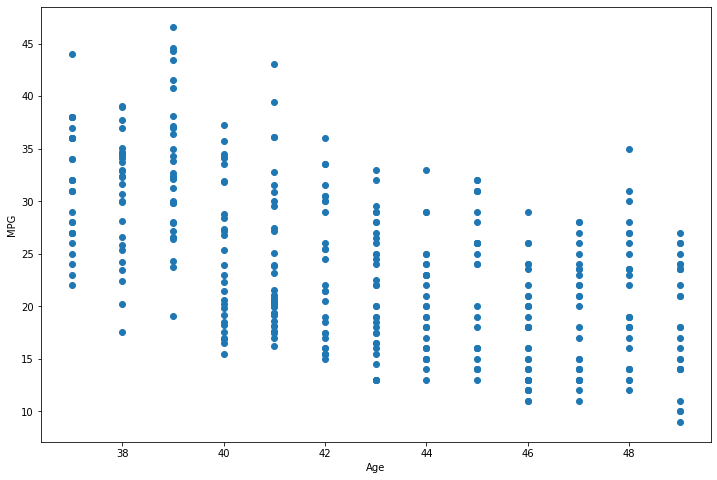

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['Age'], automobile_df['MPG'])
plt.xlabel('Age')
plt.ylabel('MPG')
plt.show()

In [19]:
def find_accuracy_score(x, y, ratio, xlabel='', ylabel=''):
    
    # Split train and test set
    from sklearn.model_selection import train_test_split
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=ratio)
    
    # Fit linear regression and find training accuracy
    from sklearn.linear_model import LinearRegression
    linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
    print('Training Score: ', linear_model.score(x_train, y_train))
    
    # Fit linear model to test data 
    y_pred = linear_model.predict(x_test)
    
    # Find testing accuracy
    from sklearn.metrics import r2_score
    print('Testing Score: ', r2_score(y_test, y_pred))
    
    if xlabel != '' and ylabel != '':
        # Plot regression line
        fig, ax = plt.subplots(figsize=(12,8))
        plt.scatter(x, y, color='g')
        plt.plot(x_test, y_pred, color='r')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

Training Score:  0.3184213567592856
Testing Score:  0.3283414770143859


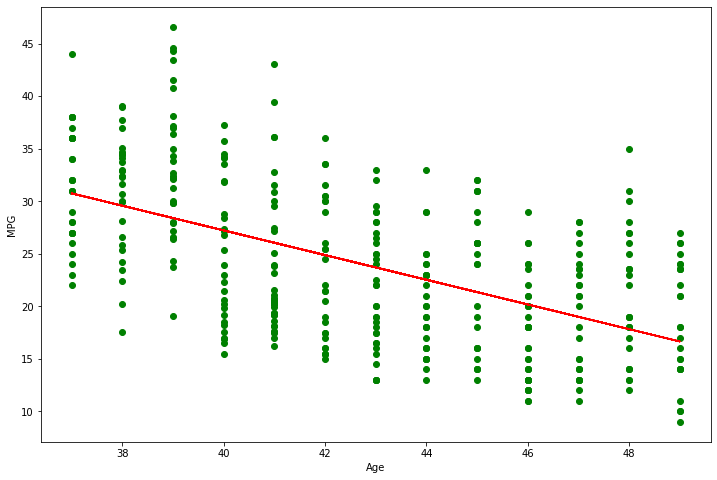

In [20]:
x = automobile_df[['Age']]
y = automobile_df['MPG']
find_accuracy_score(x, y, 0.2, 'Age', 'MPG')

Training Score:  0.5996833021713398
Testing Score:  0.5009819902969774


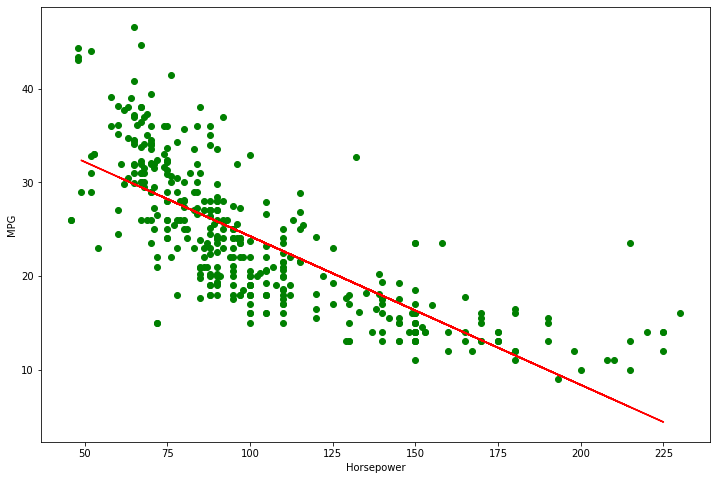

In [21]:
x = automobile_df[['Horsepower']]
y = automobile_df['MPG']
find_accuracy_score(x, y, 0.2, 'Horsepower', 'MPG')

In [17]:
automobile_df = pd.get_dummies(automobile_df, columns=['Origin'])
automobile_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age,Origin_Europe,Origin_Japan,Origin_US
0,18.000000,8,307.0,130,3504,12.0,49,0,0,1
1,16.000000,8,304.0,150,3433,12.0,49,0,0,1
2,17.000000,8,302.0,140,3449,10.5,49,0,0,1
3,14.000000,8,454.0,220,4354,9.0,49,0,0,1
4,23.551429,8,440.0,215,4312,8.5,49,0,0,1
...,...,...,...,...,...,...,...,...,...,...
382,27.000000,4,140.0,86,2790,15.6,37,0,0,1
383,44.000000,4,97.0,52,2130,24.6,37,1,0,0
384,32.000000,4,135.0,84,2295,11.6,37,0,0,1
385,28.000000,4,120.0,79,2625,18.6,37,0,0,1


In [22]:
x = automobile_df.drop(['MPG'], inplace=False, axis=1)
y = automobile_df['MPG']
find_accuracy_score(x, y, 0.2)

Training Score:  0.8159864321450495
Testing Score:  0.7534981202608186
